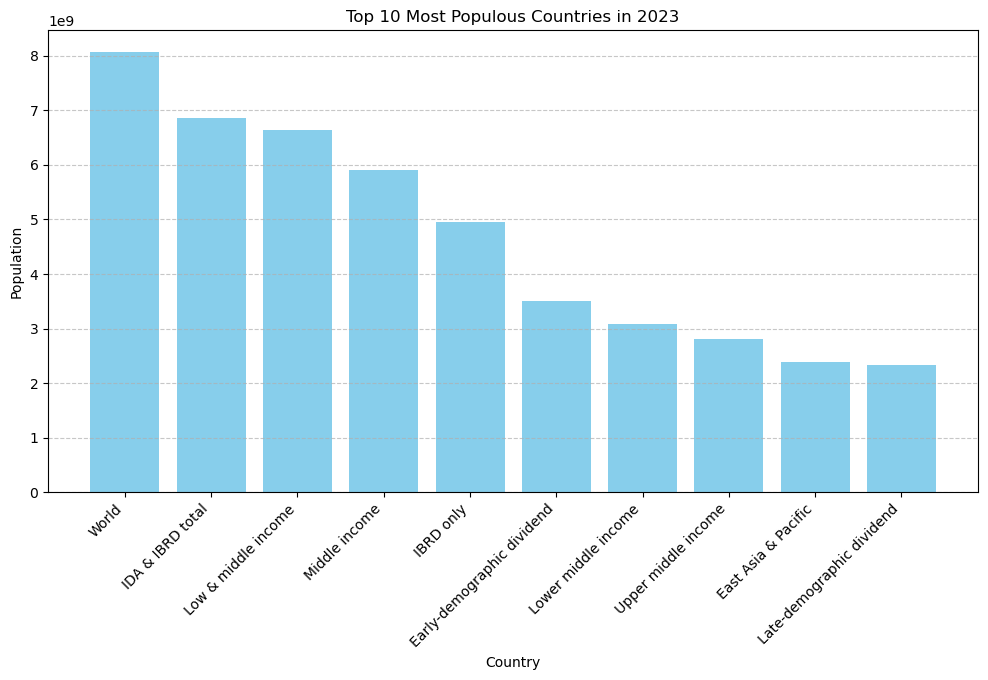

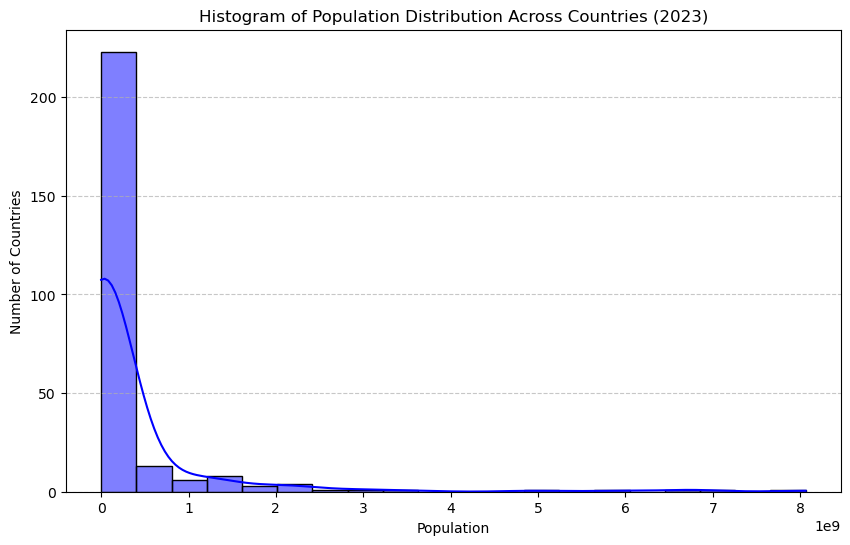

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


zip_path = r"C:\Users\Shravani\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_87.zip"


extract_folder = r"C:\Users\Shravani\Downloads\population_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


csv_filename = "API_SP.POP.TOTL_DS2_en_csv_v2_87.csv"
data_path = os.path.join(extract_folder, csv_filename)


df = pd.read_csv(data_path, skiprows=4)


df_latest = df[["Country Name", "2023"]].dropna()
df_latest["2023"] = pd.to_numeric(df_latest["2023"], errors="coerce")
top_countries = df_latest.sort_values(by="2023", ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.bar(top_countries["Country Name"], top_countries["2023"], color="skyblue")
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Top 10 Most Populous Countries in 2023")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df_latest["2023"], bins=20, kde=True, color="blue")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.title("Histogram of Population Distribution Across Countries (2023)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
